In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import Holt
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

In [8]:
%pip install statsmodels --upgrade

     |████████████████████████████████| 9.8 MB 5.7 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [6]:
df = pd.read_excel('TSLA.xlsx')
df.head()

,Date,Price
0,2021-01-03,880.02
1,2021-01-10,826.16
2,2021-01-17,846.64
3,2021-01-24,793.53
4,2021-01-31,852.23


In [33]:
dfc = pd.read_excel('TSLA Change.xlsx')
dfc.head()

,Date,Change
0,2021-01-03,0.2471
1,2021-01-10,-0.0612
2,2021-01-17,0.0248
3,2021-01-24,-0.0627
4,2021-01-31,0.0740


In [7]:
df.set_index(df['Date'], inplace=True, drop=True)
df.drop(labels='Date', axis=1, inplace=True)
df.head()

,Price
Date,
2021-01-03,880.02
2021-01-10,826.16
2021-01-17,846.64
2021-01-24,793.53
2021-01-31,852.23


In [34]:
dfc.set_index(dfc['Date'], inplace=True, drop=True)
dfc.drop(labels='Date', axis=1, inplace=True)
dfc.head()

,Change
Date,
2021-01-03,0.2471
2021-01-10,-0.0612
2021-01-17,0.0248
2021-01-24,-0.0627
2021-01-31,0.0740


In [11]:
Holt_model = Holt(df, initialization_method="estimated").fit(smoothing_level=0.3, smoothing_trend=0.5)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)


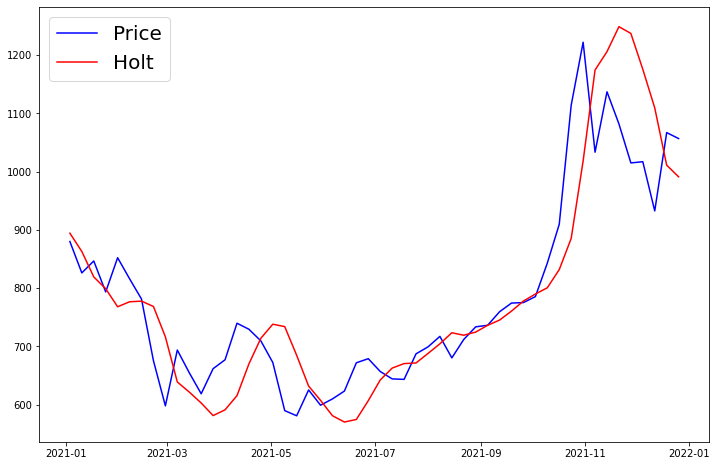

In [12]:
labels = ['Price', 'Holt']

plt.figure(figsize=(12, 8))
plt.plot(df, color="blue")
plt.plot(Holt_model.fittedvalues, color="red")
plt.legend(labels,prop={'size': 20})
plt.show()

In [13]:
Holt_model.fittedvalues

Date
2021-01-03     894.306356
2021-01-10     862.927178
2021-01-17     819.288677
2021-01-24     798.988424
2021-01-31     768.026484
2021-02-07     776.593653
2021-02-14     777.686623
2021-02-21     768.547709
2021-02-28     716.453313
2021-03-07     638.946739
2021-03-14     621.643626
2021-03-21     602.857403
2021-03-28     581.236936
2021-04-04     591.091570
2021-04-11     615.460077
2021-04-18     669.994021
2021-04-25     713.964679
2021-05-02     738.077437
2021-05-09     733.979252
2021-05-16     684.685635
2021-05-23     631.951258
2021-05-30     607.329505
2021-06-06     581.001353
2021-06-13     570.156943
2021-06-20     574.564814
2021-06-27     606.814103
2021-07-04     642.310489
2021-07-11     662.768886
2021-07-18     670.488431
2021-07-25     671.573848
2021-08-01     687.823562
2021-08-08     704.459828
2021-08-15     723.432740
2021-08-22     719.164868
2021-08-29     724.588626
2021-09-05     736.227464
2021-09-12     745.191030
2021-09-19     760.576372
2021-09

In [24]:
Holt_model.fittedvalues.to_excel('Holt_model.xlsx')

In [42]:
exp_model = SimpleExpSmoothing(dfc, initialization_method="heuristic").fit(
    smoothing_level=0.2, optimized=False
)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)


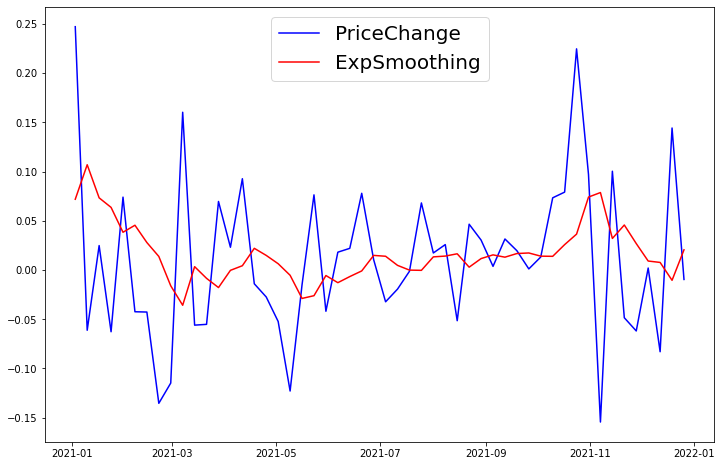

In [43]:
labels = ['PriceChange', 'ExpSmoothing']

plt.figure(figsize=(12, 8))
plt.plot(dfc, color="blue")
plt.plot(exp_model.fittedvalues, color="red")
plt.legend(labels,prop={'size': 20})
plt.show()

In [44]:
exp_model.fittedvalues

Date
2021-01-03    0.071847
2021-01-10    0.106897
2021-01-17    0.073278
2021-01-24    0.063582
2021-01-31    0.038326
2021-02-07    0.045461
2021-02-14    0.027889
2021-02-21    0.013771
2021-02-28   -0.016063
2021-03-07   -0.035811
2021-03-14    0.003391
2021-03-21   -0.008487
2021-03-28   -0.017829
2021-04-04   -0.000344
2021-04-11    0.004345
2021-04-18    0.022016
2021-04-25    0.014813
2021-05-02    0.006370
2021-05-09   -0.005364
2021-05-16   -0.028871
2021-05-23   -0.026097
2021-05-30   -0.005617
2021-06-06   -0.012874
2021-06-13   -0.006679
2021-06-20   -0.000943
2021-06-27    0.014825
2021-07-04    0.013960
2021-07-11    0.004708
2021-07-18   -0.000113
2021-07-25   -0.000351
2021-08-01    0.013339
2021-08-08    0.014132
2021-08-15    0.016465
2021-08-22    0.002872
2021-08-29    0.011598
2021-09-05    0.015358
2021-09-12    0.013027
2021-09-19    0.016721
2021-09-26    0.017297
2021-10-03    0.014058
2021-10-10    0.013886
2021-10-17    0.025769
2021-10-24    0.036435
2021-1

In [45]:
exp_model.fittedvalues.to_excel('exp_model.xlsx')